In [48]:
import pymangle
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
from matplotlib import pyplot as plt

In [60]:
def spherical_caps_vector(ra, dec, theta, reverse = False):
    """
    Transform the (ra, dec, theta) into (x, y, z, 1-h) for spherical cap vector
    :param reverse: default is False, control reverse of 1-h
    :param ra: ra angle which represents spherical cap (degree)
    :param dec: dec angle which represents spherical cap (degree)
    :param theta: radius on the surface of the unit sphere (degree)
    :return: vector that represents the spherical cap in (x, y, z, 1-h)
    """

    c = SkyCoord(ra, dec).cartesian
    
    if reverse:
        return [c.x.value, c.y.value, c.z.value, -(1.-np.cos(theta)).value]
    
    return [c.x.value, c.y.value, c.z.value, (1.-np.cos(theta)).value]

In [6]:
spherical_caps_vector(76*u.deg, 36*u.deg, 5*u.deg)

[0.19571892485153297,
 0.7849857321266633,
 0.5877852522924731,
 0.003805301908254455]

In [7]:
spherical_caps_vector(75*u.deg, 35*u.deg, 5*u.deg)

[0.21201214989665462,
 0.7912401152362238,
 0.573576436351046,
 0.003805301908254455]

In [26]:
def create_mangle_ply(filename, polygons):
    """
    Create ply file for given caps info, varying weight is not supported at current version
    :param filename: name for the created mangle file
    :param polygons: caps info
    """
    with open(filename, 'w') as f:
        f.write(f"{len(polygons)} polygons\n")
        for i, caps in enumerate(polygons):
            f.write(f"polygon {i+1} ( {len(caps)} caps, 1 weight, 0 pixle, 0 str):\n")
            for cap in caps:
                f.write(f"{' '.join(list(map(str, cap)))}\n")

In [29]:
polygons = [[spherical_caps_vector(76*u.deg, 36*u.deg, 5*u.deg), spherical_caps_vector(75*u.deg, 35*u.deg, 5*u.deg)]]
create_mangle_ply("intersection.ply", polygons)

In [30]:
polygons = [[spherical_caps_vector(76*u.deg, 36*u.deg, 5*u.deg)], [spherical_caps_vector(75*u.deg, 35*u.deg, 5*u.deg)]]
create_mangle_ply("bothcaps.ply", polygons)

In [32]:
minter = pymangle.Mangle("intersection.ply")
mboth = pymangle.Mangle("bothcaps.ply")

In [33]:
ra_inter, dec_inter = minter.genrand(10000)
ra_both, dec_both = mboth.genrand(10000)

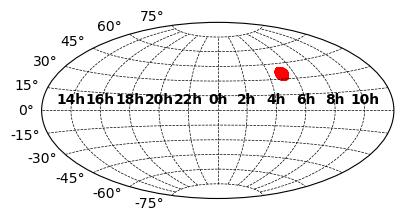

In [42]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(121, projection='aitoff')
ax.scatter(ra_inter*u.deg.to(u.rad), dec_inter*u.deg.to(u.rad), marker='o', color='b', s=0.7, alpha=0.5)
ax.scatter(ra_both*u.deg.to(u.rad), dec_both*u.deg.to(u.rad), marker='o', color='r', s=0.7, alpha=0.5)
xlab = [f'{str(i)}h' for i in np.arange(14, 36, 2)%24]
ax.set_xticklabels(xlab, weight=800)
ax.grid(color='k', linestyle='--', linewidth=0.5)

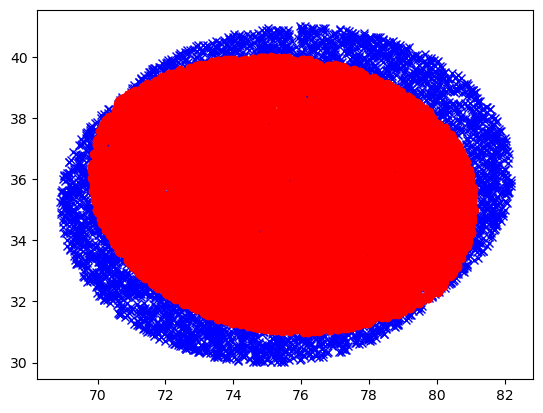

In [45]:
plt.plot(ra_both, dec_both, 'bx')
plt.plot(ra_inter, dec_inter, 'ro')

## Intersection only consider intersection region showing as red region, whereas both shows all the region in total as blue region.

In [49]:
polygons = [[spherical_caps_vector(76*u.deg, 36*u.deg, 5*u.deg), spherical_caps_vector(75*u.deg, 35*u.deg, 5*u.deg, True)]]
create_mangle_ply("mflip1.ply", polygons)

In [51]:
mflip1 = pymangle.Mangle("mflip1.ply")
ra_flip, dec_flip = mflip1.genrand(10000)

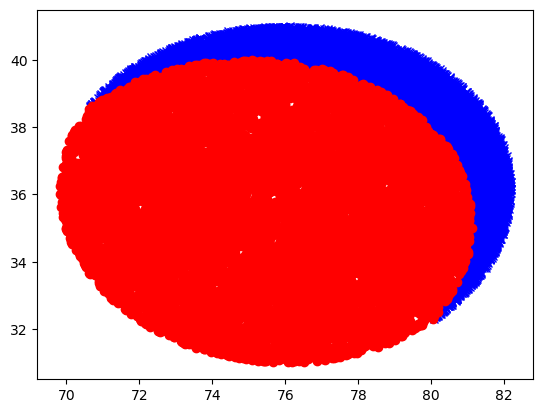

In [54]:
plt.plot(ra_flip, dec_flip, 'bx')
plt.plot(ra_inter, dec_inter, 'ro')

In [55]:
polygons = [[spherical_caps_vector(76*u.deg, 36*u.deg, 5*u.deg, True), spherical_caps_vector(75*u.deg, 35*u.deg, 5*u.deg)]]
create_mangle_ply("mflip2.ply", polygons)

In [56]:
mflip2 = pymangle.Mangle("mflip2.ply")
ra_flip2, dec_flip2 = mflip2.genrand(10000)

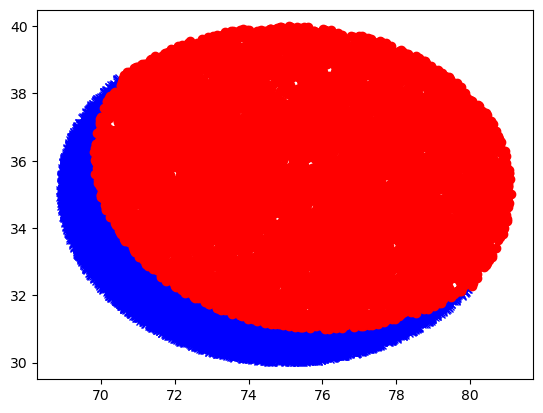

In [59]:
plt.plot(ra_flip2, dec_flip2, 'bx')
plt.plot(ra_inter, dec_inter, 'ro')

## It is basically the intersection of the flipped region with the other cap.

In [61]:
polygons = [[spherical_caps_vector(76*u.deg, 36*u.deg, 5*u.deg, True), spherical_caps_vector(75*u.deg, 35*u.deg, 5*u.deg, True)]]
create_mangle_ply("intersection_flip.ply", polygons)

In [62]:
m_intersection_flip = pymangle.Mangle("intersection_flip.ply")
ra_intersection_flip, dec_intersection_flip = m_intersection_flip.genrand(1000000)

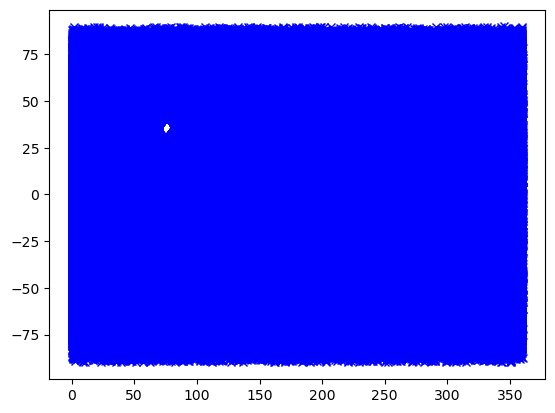

In [63]:
plt.plot(ra_intersection_flip, dec_intersection_flip, 'bx')